In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import gridspec

import iminuit
print("iminuit version:", iminuit.__version__)
from iminuit import Minuit
from iminuit.cost import LeastSquares

iminuit version: 1.5.2


In [2]:
def lin(x,a,b):
    return a*x+b

In [6]:
N = 100000
M = 5
sigma = 0.01

results={"slope":[], "average":[],}
for i in range(N):

    x = np.arange(M)
    r = np.random.normal(size=M)*sigma
    # y = x+np.cumsum(r)
    y = x+r

    results["average"].append( np.mean(np.diff(y)) )

    least_squares = LeastSquares(x, y, np.ones_like(y)*sigma, lin)
    m = Minuit(least_squares, a=1.1, b=0.1, limit_a=(0,2), limit_b=(-3, 3))
    m.migrad()    
    a, b = m.np_values()
    if not np.isfinite(a):
        print(a)
        print(x,y)

    results["slope"].append( a )


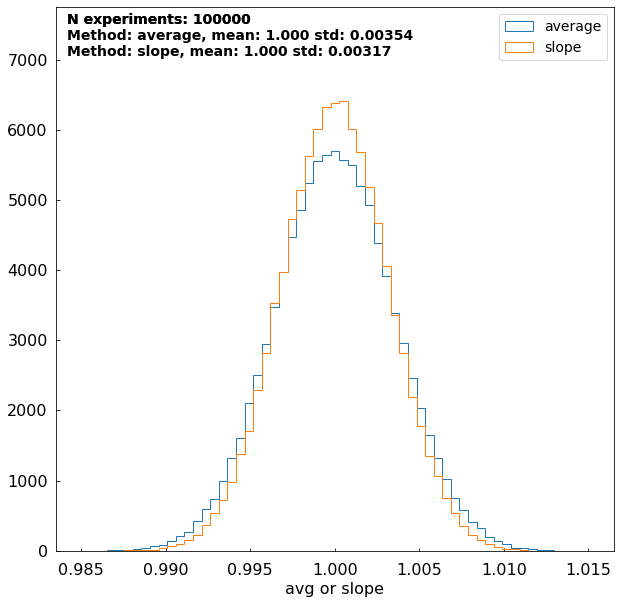

In [7]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(111)
ax0.set_xlabel("avg or slope", fontsize=16)
ax0.tick_params(axis='y', which='major', direction="in", labelsize=16, pad = 8)
ax0.tick_params(axis='x', which='major', direction="in", labelsize=16, pad = 12)
for ik, k in enumerate(sorted(results.keys())):
    ax0.hist(results[k], bins=np.linspace(0.985,1.015, 60), density=False, histtype='step', align='mid', label=str(k))
    ax0.text(0.02, 1-0.01, "N experiments: {}".format(N),
                        horizontalalignment='left',
                        verticalalignment='top',
                        transform=ax0.transAxes,
                        fontname='sans-serif',
                        fontweight='bold',
                        fontsize=14)
    ax0.text(0.02, 1-0.04-ik*0.03, "Method: {}, mean: {:0.3f} std: {:0.5f}".format(k, np.mean(results[k]), np.std(results[k])),
                        horizontalalignment='left',
                        verticalalignment='top',
                        transform=ax0.transAxes,
                        fontname='sans-serif',
                        fontweight='bold',
                        fontsize=14)

ax0.set_ylim(0, ax0.get_ylim()[1]*1.15)
ax0.legend(fontsize=14)